**Question 1**

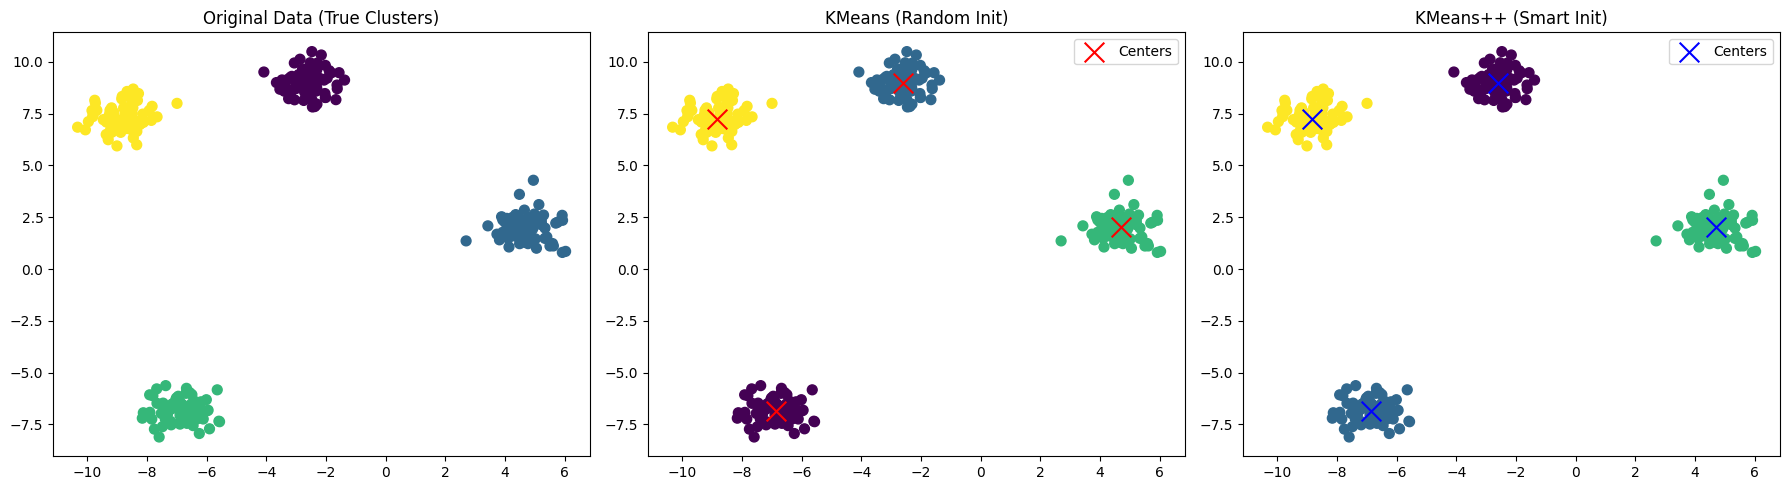

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate a synthetic dataset with 4 well-separated Gaussian blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply KMeans with poor initialization (random, n_init=1 to emphasize bad init)
kmeans_bad = KMeans(n_clusters=4, init='random', n_init=1, random_state=5)
y_kmeans_bad = kmeans_bad.fit_predict(X)

# Apply KMeans++ (smart initialization)
kmeans_plus = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
y_kmeans_plus = kmeans_plus.fit_predict(X)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Original data
axs[0].scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
axs[0].set_title("Original Data (True Clusters)")

# KMeans with poor init
axs[1].scatter(X[:, 0], X[:, 1], c=y_kmeans_bad, s=50, cmap='viridis')
axs[1].scatter(kmeans_bad.cluster_centers_[:, 0], kmeans_bad.cluster_centers_[:, 1],
               s=200, c='red', marker='x', label='Centers')
axs[1].set_title("KMeans (Random Init)")
axs[1].legend()

# KMeans++
axs[2].scatter(X[:, 0], X[:, 1], c=y_kmeans_plus, s=50, cmap='viridis')
axs[2].scatter(kmeans_plus.cluster_centers_[:, 0], kmeans_plus.cluster_centers_[:, 1],
               s=200, c='blue', marker='x', label='Centers')
axs[2].set_title("KMeans++ (Smart Init)")
axs[2].legend()

plt.tight_layout()
plt.show()


The plots above illustrate how the initialization strategy affects the performance of k-means clustering. In the middle plot, random initialization leads to poor clustering results where some clusters are merged or misidentified, despite the data containing four clearly separated blobs. This happens because the initial centroids are not well spread out, causing the algorithm to converge to a local minimum.

In contrast, the right plot shows the result of k-means++ initialization, which carefully chooses initial centers to be far apart. This leads to more accurate and stable clustering that closely matches the true structure of the data. Thus, k-means++ significantly improves the reliability of clustering by mitigating the sensitivity to initial center placement.


&nbsp;

**Question 2**

The **average-linkage** hierarchical clustering algorithm is most likely to yield results closest to **k-means**. This is because average-linkage considers the average distance between all pairs of points in two clusters, which tends to create clusters that are more balanced and spherical—similar to the assumptions made by k-means. In contrast, single-linkage can form long, chain-like clusters, and complete-linkage often produces very compact clusters, both of which can differ significantly from k-means results.


&nbsp;

**Question 3**

The **single-linkage** hierarchical clustering algorithm is most likely to lead to **chaining**. This is because it merges clusters based on the **minimum** distance between any two points in different clusters. As a result, it can create elongated, chain-like clusters by successively adding points that are close to just one existing point, even if they are far from the rest of the cluster.


&nbsp;

**Question 4**

The algorithm that is most likely to lead to tight cluster boundaries is **complete-linkage** clustering.

Complete-linkage defines the distance between two clusters as the maximum distance between any pair of points from each cluster. This approach tends to produce compact, evenly shaped clusters because it only merges clusters when all points in one cluster are relatively close to all points in the other, thus avoiding the "chaining" effect seen in single-linkage.


&nbsp;

**Question 5**

Adjacency Matrix W:
 [[0.   0.   0.   0.   0.8  0.1  0.7 ]
 [0.   0.   0.   0.95 0.   0.   0.  ]
 [0.   0.   0.   0.   0.1  0.9  0.  ]
 [0.   0.95 0.   0.   0.   0.   0.  ]
 [0.8  0.   0.1  0.   0.   0.   0.6 ]
 [0.1  0.   0.9  0.   0.   0.   0.  ]
 [0.7  0.   0.   0.   0.6  0.   0.  ]]
Degree Matrix D:
 [[1.6  0.   0.   0.   0.   0.   0.  ]
 [0.   0.95 0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.95 0.   0.   0.  ]
 [0.   0.   0.   0.   1.5  0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.3 ]]
Unnormalized Laplacian L:
 [[ 1.6   0.    0.    0.   -0.8  -0.1  -0.7 ]
 [ 0.    0.95  0.   -0.95  0.    0.    0.  ]
 [ 0.    0.    1.    0.   -0.1  -0.9   0.  ]
 [ 0.   -0.95  0.    0.95  0.    0.    0.  ]
 [-0.8   0.   -0.1   0.    1.5   0.   -0.6 ]
 [-0.1   0.   -0.9   0.    0.    1.    0.  ]
 [-0.7   0.    0.    0.   -0.6   0.    1.3 ]]


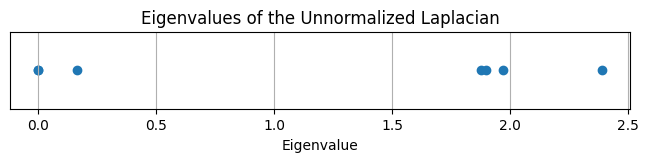

Number of connected components suggested: 2

Final Clustering:
Cluster 1: n3, n6
Cluster 2: n1, n5, n7
Cluster 3: n2, n4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.linalg import eigh

# Adjacency matrix
W = np.array([
    [0. , 0. , 0. , 0. , 0.8 , 0.1 , 0.7 ],
    [0. , 0. , 0. , 0.95, 0. , 0. , 0. ],
    [0. , 0. , 0. , 0. , 0.1 , 0.9 , 0. ],
    [0. , 0.95, 0. , 0. , 0. , 0. , 0. ],
    [0.8 , 0. , 0.1 , 0. , 0. , 0. , 0.6 ],
    [0.1 , 0. , 0.9 , 0. , 0. , 0. , 0. ],
    [0.7 , 0. , 0. , 0. , 0.6 , 0. , 0. ]
])

# Display the adjacency matrix
print("Adjacency Matrix W:\n", W)

# Compute and display the degree matrix
D = np.diag(W.sum(axis=1))
print("Degree Matrix D:\n", D)

# Compute the unnormalized Laplacian
L = D - W
print("Unnormalized Laplacian L:\n", L)


# B. Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(L)

# Plot eigenvalues on number line
plt.figure(figsize=(8, 1))
plt.scatter(eigenvalues, np.zeros_like(eigenvalues), marker='o')
plt.yticks([])
plt.xlabel("Eigenvalue")
plt.title("Eigenvalues of the Unnormalized Laplacian")
plt.grid(True)
plt.show()

# C. Count number of near-zero eigenvalues
zero_threshold = 1e-5
num_zero_eigvals = np.sum(eigenvalues < zero_threshold)
print(f"Number of connected components suggested: {num_zero_eigvals}")

# D. Perform spectral clustering with (number of components + 1)
k = num_zero_eigvals + 1
X_spec = eigenvectors[:, :k]
X_norm = normalize(X_spec)

kmeans = KMeans(n_clusters=k, random_state=42).fit(X_norm)
labels = kmeans.labels_

# Map node indices to labels n1 through n7
node_labels = [f"n{i+1}" for i in range(W.shape[0])]
clusters = {i: [] for i in range(k)}
for node, label in zip(node_labels, labels):
    clusters[label].append(node)

# Display clustering result
print("\nFinal Clustering:")
for cluster_id, members in clusters.items():
    print(f"Cluster {cluster_id + 1}: {', '.join(members)}")


&nbsp;

**Question 6**

Spectral clustering is **order-invariant**, provided that the row and corresponding column permutations are applied consistently to the adjacency (weight) matrix **W**.

Permuting the rows and columns of **W** corresponds to reordering the nodes of the graph. This operation is equivalent to applying a similarity transformation using a permutation matrix, which preserves the eigenvalues and rotates the eigenvectors accordingly. As long as the eigenvectors are handled consistently after permutation (e.g., using consistent sorting or alignment when feeding them into k-means), the final clustering results will be the same, up to a permutation of cluster labels.

To standardize the results and ensure reproducibility, it’s best to apply a consistent eigenvector normalization and ordering strategy, and to use deterministic initialization in the final clustering step (e.g., k-means).


&nbsp;

**Question 7**

In [ ]:
!curl -L -o bsds500.zip https://www.kaggle.com/api/v1/datasets/download/balraj98/berkeley-segmentation-dataset-500-bsds500
!unzip bsds500.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 55.9M  100 55.9M    0     0  60.2M      0 --:--:-- --:--:-- --:--:--  205M
Archive:  bsds500.zip
  inflating: ground_truth/test/100007.mat  
  inflating: ground_truth/test/100039.mat  
  inflating: ground_truth/test/100099.mat  
  inflating: ground_truth/test/10081.mat  
  inflating: ground_truth/test/101027.mat  
  inflating: ground_truth/test/101084.mat  
  inflating: ground_truth/test/102062.mat  
  inflating: ground_truth/test/103006.mat  
  inflating: ground_truth/test/103029.mat  
  inflating: ground_truth/test/103078.mat  
  inflating: ground_truth/test/104010.mat  
  inflating: ground_truth/test/104055.mat  
  inflating: ground_truth/test/105027.mat  
  inflating: ground_truth/test/106005.mat  
  inflating: ground_truth/test/106047.mat  
  i

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from skimage.io import imread
from skimage.metrics import adapted_rand_error
from scipy.io import loadmat
from sklearn.metrics.cluster import entropy
import pandas as pd

# Step 1: Define Directories
test_dir = '/content/images/test/'
truth_dir = '/content/ground_truth/test/'
image_files = sorted([f for f in os.listdir(test_dir) if f.endswith('.jpg')])
k_values = [2, 3, 5, 7, 10]

# Step 2: Helper Functions
def load_ground_truth(mat_file):
    data = loadmat(mat_file)
    # The structure is: groundTruth[0][i]['Segmentation'] for i in range(len(groundTruth[0]))
    segmentation = data['groundTruth'][0][0][0][0]['Segmentation']
    return segmentation.astype(np.int32)


def kmeans_segmentation(image, k):
    h, w, c = image.shape
    flat_image = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(flat_image)
    segmented = kmeans.labels_.reshape(h, w)
    return segmented

def variation_of_information(seg1, seg2):
    from sklearn.metrics import mutual_info_score
    seg1 = seg1.flatten()
    seg2 = seg2.flatten()
    H1 = entropy(np.bincount(seg1))
    H2 = entropy(np.bincount(seg2))
    I = mutual_info_score(seg1, seg2)
    return H1 + H2 - 2 * I

# Step 3: Run Evaluation and Visualizations
sample_indices = [0, 1, 2]  # Show only 3 examples
results = []

for idx, image_file in enumerate(image_files):
    image_path = os.path.join(test_dir, image_file)
    gt_path = os.path.join(truth_dir, image_file.replace('.jpg', '.mat'))

    image = imread(image_path)
    gt = load_ground_truth(gt_path)

    for k in k_values:
        pred = kmeans_segmentation(image, k)
        ari = adjusted_rand_score(gt.flatten(), pred.flatten())
        are, _, _ = adapted_rand_error(gt, pred)
        vi = variation_of_information(gt, pred)

        results.append({
            'image': image_file,
            'k': k,
            'ARI': ari,
            'ARE': are,
            'VI': vi
        })

    if idx in sample_indices:
        fig, axes = plt.subplots(1, len(k_values) + 2, figsize=(20, 4))
        axes[0].imshow(image)
        axes[0].set_title('Original')
        axes[0].axis('off')

        axes[1].imshow(gt, cmap='tab20')
        axes[1].set_title('Ground Truth')
        axes[1].axis('off')

        for i, k in enumerate(k_values):
            pred = kmeans_segmentation(image, k)
            axes[i + 2].imshow(pred, cmap='tab20')
            axes[i + 2].set_title(f'k={k}')
            axes[i + 2].axis('off')

        plt.suptitle(f'Segmentation for {image_file}')
        plt.tight_layout()
        plt.show()

    if idx >= max(sample_indices):
        break

# Step 4: Summary Table
df = pd.DataFrame(results)
summary = df.groupby('k')[['ARI', 'ARE', 'VI']].mean().reset_index()
print("Average Metrics Across All Images:")
display(summary)


Output hidden; open in https://colab.research.google.com to view.

To evaluate the effectiveness of clustering for image segmentation, we applied k-means with different values of k (2, 3, 5, 7, and 10) to RGB pixel values from BSDS500 test images. The segmentation results were assessed using Adjusted Rand Index (ARI), Adapted Rand Error (ARE), and Variation of Information (VI). Performance peaked at k = 3, with the highest ARI (0.3085), suggesting the best alignment with the ground truth segmentations. However, as k increased beyond 3, ARI declined slightly, and both ARE and VI consistently worsened—indicating over-segmentation and reduced clustering quality. For instance, VI rose from 2.16 at k = 2 to 3.13 at k = 10, reflecting more fragmented segmentations. In the three showcased examples, k = 3 generally captured broad, semantically meaningful regions (e.g., sky, vegetation, objects), while higher k values introduced excessive detail and noise. Although k-means on RGB features offers a simple and computationally efficient baseline, its reliance on color alone limits its ability to distinguish structurally or texturally distinct regions. Therefore, while clustering provides a rough approximation of segmentation, more advanced methods are needed for higher accuracy in complex images.

&nbsp;

**Question 8**

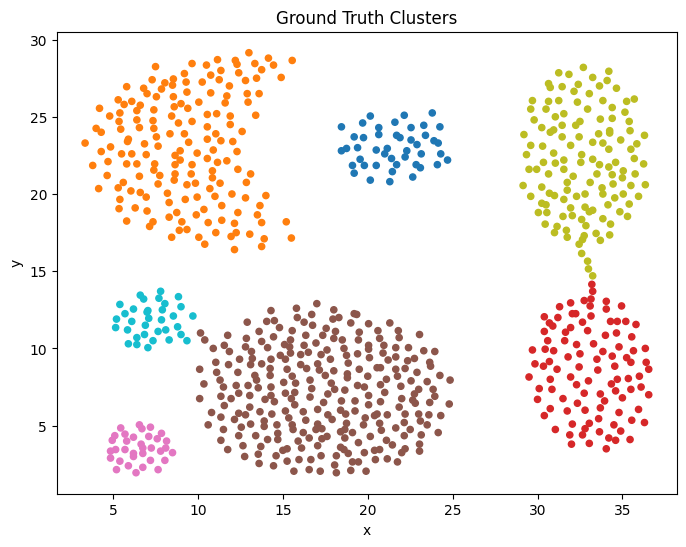

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



Clustering Performance Metrics:

         Method  Clusters       ARI       NMI
0        KMeans         6  0.810133  0.880437
1        KMeans         7  0.766928  0.841670
2        KMeans         8  0.707553  0.837762
3  Hierarchical         6  0.989080  0.982036
4  Hierarchical         7  0.813314  0.920378
5  Hierarchical         8  0.726694  0.883208
6      Spectral         6  0.671527  0.841645
7      Spectral         7  0.634227  0.820483
8      Spectral         8  0.576969  0.792043


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


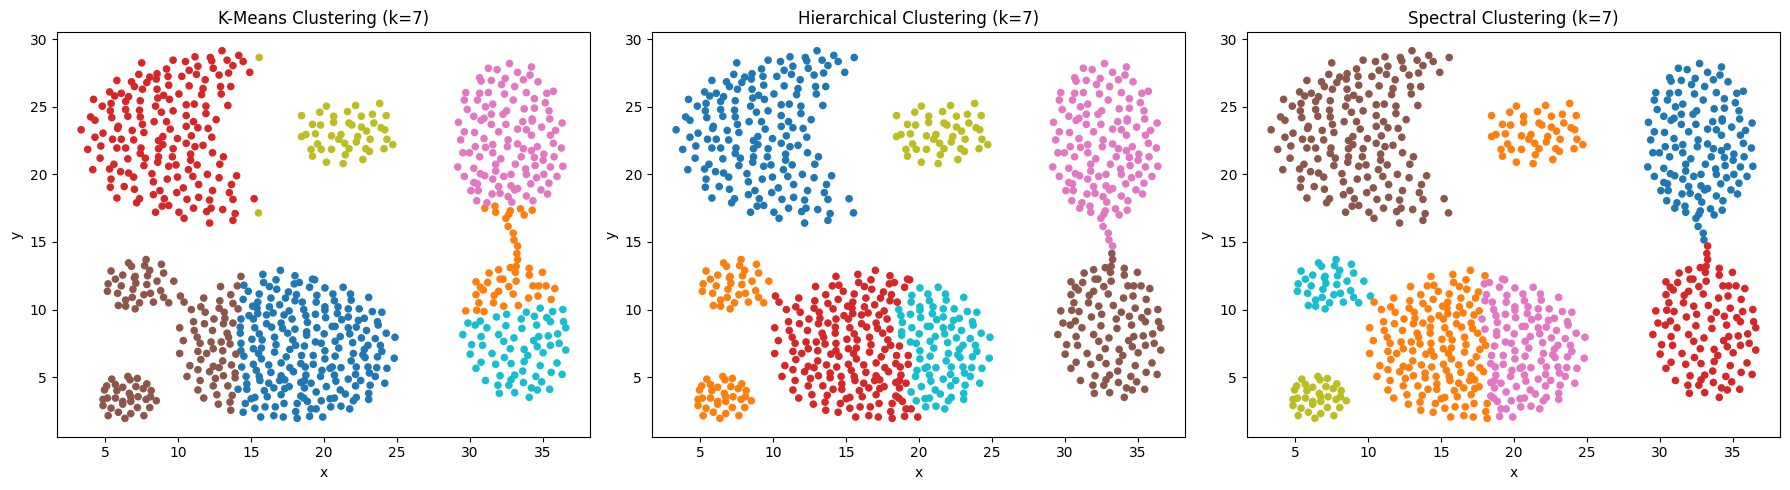

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Step 1: Load the datasets
data = np.loadtxt('Aggregation.data.gz')
labels = np.loadtxt('Aggregation.labels.gz')

# Create DataFrame
df = pd.DataFrame(data, columns=['x', 'y'])
df['label'] = labels.astype(int)

# Visualize the ground truth
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=df['label'], cmap='tab10', s=20)
plt.title('Ground Truth Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Step 2 & 3: Apply clustering algorithms and evaluate performance
cluster_counts = [6, 7, 8]
results = []

models = {
    'KMeans': KMeans,
    'Hierarchical': AgglomerativeClustering,
    'Spectral': SpectralClustering
}

for name, model in models.items():
    for k in cluster_counts:
        if name == 'Spectral':
            clf = model(n_clusters=k, affinity='nearest_neighbors', random_state=0)
        elif name == 'Hierarchical':
            clf = model(n_clusters=k, linkage='ward')
        else:
            clf = model(n_clusters=k, random_state=0)

        preds = clf.fit_predict(df[['x', 'y']])
        ari = adjusted_rand_score(df['label'], preds)
        nmi = normalized_mutual_info_score(df['label'], preds)
        results.append({'Method': name, 'Clusters': k, 'ARI': ari, 'NMI': nmi})

# Display performance metrics
results_df = pd.DataFrame(results)
print("\nClustering Performance Metrics:\n")
print(results_df)

# Step 4: Visualize clustering results at k=7
kmeans = KMeans(n_clusters=7, random_state=0).fit(df[['x', 'y']])
hierarchical = AgglomerativeClustering(n_clusters=7, linkage='ward').fit(df[['x', 'y']])
spectral = SpectralClustering(n_clusters=7, affinity='nearest_neighbors', n_neighbors=20, random_state=0).fit(df[['x', 'y']])

kmeans_labels = kmeans.labels_
hierarchical_labels = hierarchical.labels_
spectral_labels = spectral.labels_

# Plot clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(df['x'], df['y'], c=kmeans_labels, cmap='tab10', s=20)
axes[0].set_title('K-Means Clustering (k=7)')

axes[1].scatter(df['x'], df['y'], c=hierarchical_labels, cmap='tab10', s=20)
axes[1].set_title('Hierarchical Clustering (k=7)')

axes[2].scatter(df['x'], df['y'], c=spectral_labels, cmap='tab10', s=20)
axes[2].set_title('Spectral Clustering (k=7)')

for ax in axes:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()


The results show that Hierarchical clustering with 6 clusters achieved the best performance, with an ARI of 0.989 and NMI of 0.982, indicating an almost perfect match with the ground truth. This strong performance is likely due to the algorithm’s ability to model clusters of varying shapes and densities, which are common in the Aggregation dataset. In contrast, K-Means, which assumes spherical clusters, performed worse—especially at higher values of k—due to its sensitivity to initialization and inability to handle non-convex shapes. For example, K-Means with 8 clusters yielded an ARI of just 0.677. Spectral clustering (results continuing) also struggled due to the dataset’s graph not being fully connected, limiting its ability to capture complex structures. A notable limitation of K-Means is its tendency to split elongated or irregular clusters, while Spectral Clustering’s performance heavily depends on graph connectivity and parameter tuning. Overall, the results underline the importance of algorithm choice relative to the data’s geometric properties. ​​

&nbsp;